In [9]:
import hashlib
import time
import csv
from prettytable import PrettyTable

# Generate deterministic strings for testing
def generate_deterministic_strings(total, size_mb):
    size_bytes = size_mb * 1024 * 1024  # Convert MB to Bytes
    return [("a" * size_bytes) for _ in range(total)]

# Measure hashing speed
def measure_hashing_speed(algorithm, data_size_mb, iterations):
    # Generate deterministic strings
    data = generate_deterministic_strings(iterations, data_size_mb)
    
    # Select the hashing algorithm
    hash_function = hashlib.new(algorithm)
    
    # Measure time to hash all data
    start_time = time.time()
    for s in data:
        hash_function.update(s.encode('utf-8'))
        hash_function.hexdigest()
    end_time = time.time()
    
    # Calculate metrics
    total_time_ms = (end_time - start_time) * 1e3  # Convert seconds to milliseconds
    avg_time_per_hash = total_time_ms / iterations  # Time per hash in milliseconds
    mbps = (data_size_mb * iterations) / (end_time - start_time)  # Speed in megabytes per second
    return total_time_ms, avg_time_per_hash, mbps

# Test hashing algorithms
def test_hashing_algorithms(algorithms, data_sizes_mb, iterations):
    results = []
    for algo in algorithms:
        for size_mb in data_sizes_mb:
            total_time, avg_time, mbps = measure_hashing_speed(algo, size_mb, iterations)
            results.append([algo, size_mb, iterations, total_time, avg_time, mbps])
    return results

# Main function
def main():
    # Algorithms to test
    algorithms = ['md5', 'sha1', 'sha256', 'sha3_256', 'blake2s', 'blake2b']
    # Data sizes to test (MB)
    data_sizes_mb = [1, 2, 4, 8, 16, 32, 64, 128]  # Data sizes in MB
    # Fixed number of iterations
    iterations = 10

    # Prepare PrettyTable for terminal output
    table = PrettyTable()
    table.field_names = ["Algorithm", "Data Size (MB)", "Iterations", "Total Time (ms)", "Avg Time (ms)", "Speed (MBps)"]

    # Perform tests and record results
    results = test_hashing_algorithms(algorithms, data_sizes_mb, iterations)
    for result in results:
        table.add_row([result[0], result[1], result[2], f"{result[3]:.3f}", f"{result[4]:.3f}", f"{result[5]:.3f}"])

    # Write results to CSV
    csv_file = 'hashing_speed_results.csv'
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Algorithm", "Data Size (MB)", "Iterations", "Total Time (ms)", "Avg Time (ms)", "Speed (MBps)"])
        for result in results:
            writer.writerow(result)
    
    print(f"Results have been written to {csv_file}")
    
    # Print PrettyTable
    print(table)

if __name__ == "__main__":
    main()


Results have been written to hashing_speed_results.csv
+-----------+----------------+------------+-----------------+---------------+--------------+
| Algorithm | Data Size (MB) | Iterations | Total Time (ms) | Avg Time (ms) | Speed (MBps) |
+-----------+----------------+------------+-----------------+---------------+--------------+
|    md5    |       1        |     10     |      16.019     |     1.602     |   624.264    |
|    md5    |       2        |     10     |      28.335     |     2.833     |   705.844    |
|    md5    |       4        |     10     |      55.907     |     5.591     |   715.480    |
|    md5    |       8        |     10     |     110.816     |     11.082    |   721.916    |
|    md5    |       16       |     10     |     231.297     |     23.130    |   691.753    |
|    md5    |       32       |     10     |     462.116     |     46.212    |   692.468    |
|    md5    |       64       |     10     |     916.433     |     91.643    |   698.360    |
|    md5    |  

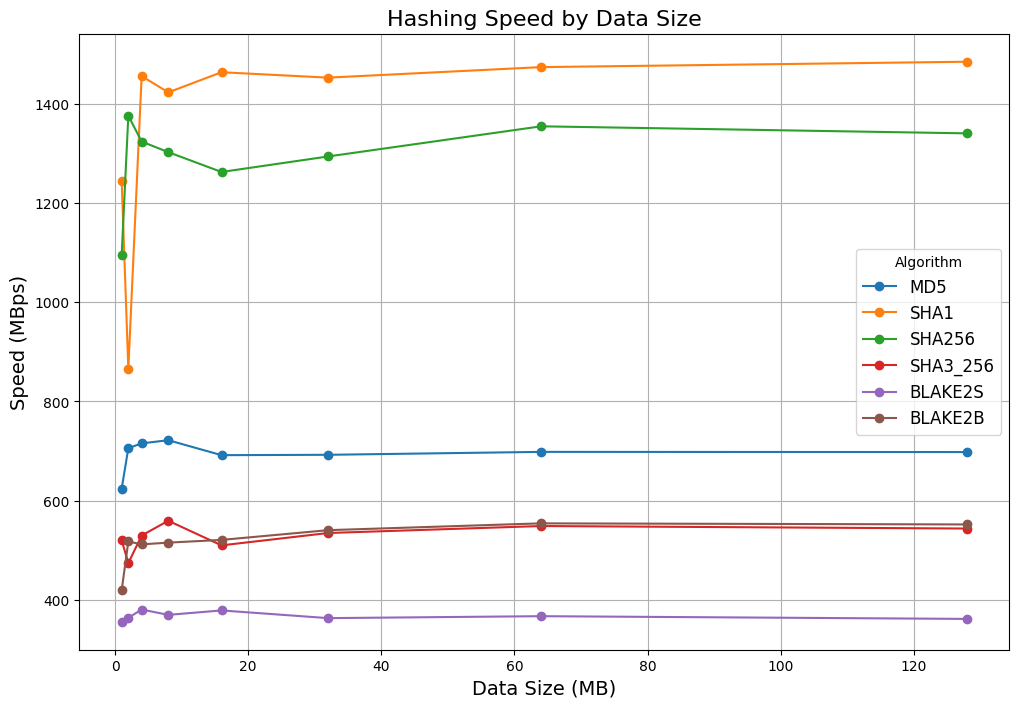

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to visualize hashing speed
def visualize_hashing_speed(csv_file):
    # Load data from CSV
    data = pd.read_csv(csv_file)

    # Extract unique algorithms
    algorithms = data['Algorithm'].unique()

    # Plot each algorithm's speed
    plt.figure(figsize=(12, 8))
    for algo in algorithms:
        algo_data = data[data['Algorithm'] == algo]
        plt.plot(algo_data['Data Size (MB)'], algo_data['Speed (MBps)'], marker='o', label=algo.upper())

    # Add plot details
    plt.title("Hashing Speed by Data Size", fontsize=16)
    plt.xlabel("Data Size (MB)", fontsize=14)
    plt.ylabel("Speed (MBps)", fontsize=14)
    plt.legend(title="Algorithm", fontsize=12)
    plt.grid(True)
    plt.show()

# Path to the CSV file generated by the testing script
csv_file_path = 'hashing_speed_results.csv'

# Visualize the hashing speed
visualize_hashing_speed(csv_file_path)
